<a href="https://colab.research.google.com/github/Judenigma/Inteligencia-Artificial-UdeA/blob/main/02_preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar librerías

In [1]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 950.7 kB/s eta 0:00:00


In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

import os

# Descargar y extraer datos






In [4]:
os.environ['KAGGLE_CONFIG_DIR'] = "."
!kaggle competitions download -c udea-ai4eng-20241
!unzip udea-ai4eng-20241.zip
!chmod 600 ./kaggle.json

 52% 11.0M/21.2M [00:00<00:00, 110MB/s]
100% 21.2M/21.2M [00:00<00:00, 130MB/s]
Archive:  udea-ai4eng-20241.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


In [5]:
data = pd.read_csv("train.csv")

In [6]:
data

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,No,No,N,Si,Si,No,Primaria completa,bajo


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              692500 non-null  int64 
 1   PERIODO                         692500 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object
 7   FAMI_TIENEINTERNET              665871 non-null  object
 8   FAMI_EDUCACIONPADRE             669322 non-null  object
 9   FAMI_TIENELAVADORA              652727 non-null  object
 10  FAMI_TIENEAUTOMOVIL             648877 non-null  object
 11  ESTU_PRIVADO_LIBERTAD           692500 non-null  object
 12  ESTU_PAGOMATRICULAPROPIO      

#Limpieza

In [8]:
for col in data.columns:
  print(f'Columna {col}: {data[col].nunique()} subniveles')

Columna ID: 692500 subniveles
Columna PERIODO: 9 subniveles
Columna ESTU_PRGM_ACADEMICO: 948 subniveles
Columna ESTU_PRGM_DEPARTAMENTO: 31 subniveles
Columna ESTU_VALORMATRICULAUNIVERSIDAD: 8 subniveles
Columna ESTU_HORASSEMANATRABAJA: 5 subniveles
Columna FAMI_ESTRATOVIVIENDA: 7 subniveles
Columna FAMI_TIENEINTERNET: 2 subniveles
Columna FAMI_EDUCACIONPADRE: 12 subniveles
Columna FAMI_TIENELAVADORA: 2 subniveles
Columna FAMI_TIENEAUTOMOVIL: 2 subniveles
Columna ESTU_PRIVADO_LIBERTAD: 2 subniveles
Columna ESTU_PAGOMATRICULAPROPIO: 2 subniveles
Columna FAMI_TIENECOMPUTADOR: 2 subniveles
Columna FAMI_TIENEINTERNET.1: 2 subniveles
Columna FAMI_EDUCACIONMADRE: 12 subniveles
Columna RENDIMIENTO_GLOBAL: 4 subniveles


<Axes: xlabel='PERIODO'>

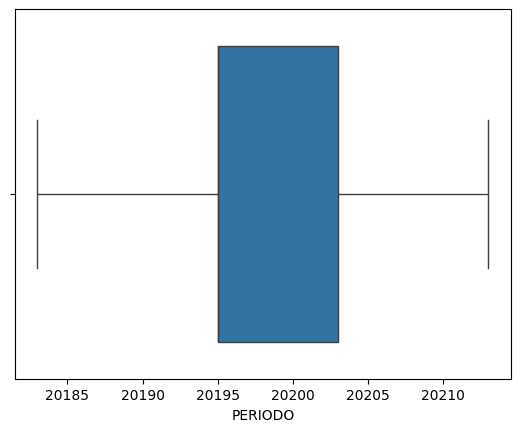

In [9]:
sns.boxplot(x='PERIODO', data= data)

In [10]:
def corregir_programa(df):
  df_res = df.copy()

  repetidos = [['PROFESIONAL EN ACTIVIDAD FISICA Y DEPORTE', 'PROFESIONAL EN ACTIVIDAD FÍSICA Y DEPORTE', 'ACTIVIDAD FISICA Y DEPORTE'], ['ADMINISTRACION COMERCIAL']
               , ['PROFESIONAL EN ADMINISTRACIÓN DE EMPRESAS', 'ADMINSITRACIÓN DE EMPRESAS','ADMINISTRACION DE EMPRESAS', 'ADMINISTRACI¿N DE EMPRESAS']
               , ['ADMINISTRACION EMPRESAS AGROINDUSTRIALES', 'ADMINISTRACION DE EMPRESAS AGROINDUSTRIALES'], ['ADMINISTRACION DE EMPRESAS AGROPECUARIAS']
               , ['ADMINISTRACION DE EMPRESAS TURISTICA', 'ADMINISTRACION DE EMPRESAS TURISTICAS', 'ADMINISTRACIÓN DE EMPRESAS TURISTICAS']
               , ['ADMINISTRACION DE EMPRESAS TURISTICAS Y HOTELERAS'], ['ADMINISTRACION DE GESTISN HUMANA']
               , ['ADMINISTRACION EN MERCADEO Y LOGISTICA INTERNACIONALES']
               , ['ADMINISTRACIÒN DE NEGOCIOS INTERNACIONALES','ADMINISTRACION DE NEGOCIOS INTERNACIONALES', 'ADMINISTRACION EN NEGOCIOS INTERNACIONALES']
               , ['ADMINISTRACION DE SERVICIOS DE SALUD', 'ADMINISTRACIÓN EN SERVICIOS DE SALUD'], ['ADMINISTRACION EN SALUD']
               , ['ADMINISTRACION DE SISTEMAS INFORMATICOS'], ['ADMINISTRACION INFORMATICA']
               , ['ADMINISTRACI¿N LOG¿STICA', 'ADMINISTRACIÓN LOGISTICA', 'ADMINISTRACION LOGISTICA'], ['ADMINISTRACION MARITIMA Y PORTUARIA']
               , ['ADMINISTRACI¿N P¿BLICA', 'ADMINISTRACION PUBLICA'], ['ADMINISTRACION TECNOLOGICA']
               , ['ADMINISTRACION TURISTICA', 'ADMINISTRACION TURÍSTICA', 'ADMINISTRACIÓN TÚRÍSTICA']
               , ['ADMINISTRACION TURISTICA Y HOTELERA', 'ADMINSITRACION TURISTICA Y HOTELERA'], ['ADMINISTRACION Y NEGOCIOS INTERNACIONALES'], ['ARTES PLASTICAS']
               , ['ADMINISTRACION  FINANCIERA', 'ADMINISTRACION FINANCIERA'], ['ANTROPOLOGIA'], ['ARTES ESCENICAS'], ['ARTES PLASTICAS']
               , ['ARTES PLASTICAS Y VISUALES']

               , ['PROFESIONAL EN BANCA Y FINANZAS'], ['BIOINGENIERIA'], ['BIOLOGIA'], ['BIOLOGIA AMBIENTAL']

               , ['CIENCIA DE LA INFORMACION - BIBLIOTECOLOGIA']
               , ['CIENCIA POLITICA', 'CIENCIA POLÍTICA', 'CIENCIAS POLITICAS'], ['CIENCIA POLITICA Y GOBIERNO'], ['PROFESIONAL EN CIENCIAS DEL DEPORTE Y LA EDUCACION FISICA']
               , ['CINE Y TELEVISION', 'PROFESIONAL EN CINE Y TELEVISION']
               , ['COMERCIO Y FINANZAS INTERNACIONALES'], ['COMUNICACION AUDIOVISUAL Y MULTIMEDIAL']
               , ['COMUNICACION SOCIAL     Y     PERIODISMO', 'COMUNICACION SOCIAL  - PERIODISMO', 'COMUNICACION SOCIAL -  PERIODISMO', 'PROFESIONAL EN COMUNICACION SOCIAL - PERIODISMO'
                , 'COMUNICACION SOCIAL - PERIODISMO', 'COMUNICACION SOCIAL- PERIODISMO', 'COMUNICACION SOCIAL-PERIODISMO', 'COMUNICACIÓN SOCIAL - PERIODISMO'
                , 'COMUNICACION SOCIAL PERIODISMO', 'COMUNICACION SOCIALY PERIODISMO', 'COMUNICACI¿N SOCIAL Y PERIODISMO', 'COMUNICACION SOCIAL Y PERIODISMO']
               , ['COMUNICACI¿N SOCIAL', 'COMUNICACION SOCIAL'], ['COMUNICACION VISUAL', 'COMUNICACI¿N VISUAL'], ['COMUNICACION AUDIOVISUAL']
               , ['CONTADURIA PUBLICA', 'CONTADURIA P¿BLICA', 'CONTADURÍA PUBLICA', 'CONTADURIA PÚBLICA', 'CONTADURÍA PÚBLICA.', 'PROFESIONAL EN CONTADURIA PUBLICA']
               , ['PROFESIONAL EN CRIMINALISTICA']

               , ['PROFESIONAL EN DEPORTE'], ['DEPORTE Y ACTIVIDADA FISICA'], ['DERECHO Y CIENCIAS POLITICAS'], ['PROFESIONAL EN DIRECCIÓN Y PRODUCCIÓN DE RADIO Y TELEVISIÓN']
               , ['DISE¿O CROSSMEDIA'], ['PROFESIONAL EN DISEÑO DE ESPACIOS'], ['DISEÑO DE ESPACIOS - ESCENARIO']
               , ['DISE¿¿O DE COMUNICACI¿¿N GR¿¿FICA'], ['DISEÑO DE MODA', 'PROFESIONAL EN DISEÑO DE MODAS'], ['PROFESIONAL EN DISEÑO DE VESTUARIO']
               , ['DISENO GRAFICO', 'DISEÑO GRAFICO', 'DISEÑO GRÀFICO', 'PROFESIONAL EN DISEÑO GRAFICO', 'PROFESIONAL EN DISEÑO GRÁFICO', 'PROFESIONAL  EN DISEÑO GRAFICO']
               , ['PROFESIONAL EN DISEÑO INDUSTRIAL'], ['PROFESIONAL EN DISEÑO VISUAL']

               , ['ECOLOGIA'], ['ECONOM¿A', 'ECONOMIA'], ['ENFERMERIA'], ['PROFESIONAL EN ENTRENAMIENTO DEPORTIVO'], ['ESTADISTICA'], ['ESTUDIOS Y GESTION CULTURAL']

               , ['FILOSOFIA', 'PROFESIONAL EN FILOSOFIA'], ['FILOSOFIA Y HUMANIDADES'], ['PROFESIONAL EN FINANZAS Y NEGOCIOS INTERNACIONALES'], ['FISICA']

               , ['GASTRONOMIA', 'PROFESIONAL EN GASTRONOMIA', 'PROFESIONAL EN GASTRONOM¿A', 'PROFESIONAL EN GASTRONOMÍA'], ['GEOLOGIA', 'GEOLOG¿A']
               , ['GESTION EN ECOLOGIA Y TURISMO']

               , ['INGENIERIA AERONAUTICA'], ['INGENIERIA AGRICOLA'], ['INGENIERIA AGROECOLOGICA'], ['INGENIERIA  AGROFORESTAL'], ['INGENIERIA AGROINDUSTRIAL']
               , ['INGENIERIA AGRONOMICA', 'INGENIERÍA AGRONOMICA', 'INGENIERIA AGRONÓMICA'], ['INGENIERIA AGROPECUARIA']
               , ['INGENIERIA AMBIENTAL', 'INGENIERIA  AMBIENTAL'], ['INGENIERIA AMBIENTAL Y SANITARIA'], ['INGENIERIA BIOMEDICA', 'INGENIERIA BIOMÉDICA']
               , ['INGENIERIA  CIVIL', 'INGENIERIA CIVIL'], ['INGENIERIA DE ALIMENTOS'], ['INGENIERIA EN CONTROL'], ['INGENIERIA DE MATERIALES'], ['INGENIERIA DE MINAS']
               , ['INGENIERIA DE PETROLEOS'], ['INGENIERIA DE PROCESOS INDUSTRIALES'], ['INGENIERIA DE PRODUCCION'], ['INGENIERIA DE SISTEMAS', 'INGENIER¿A DE SISTEMAS']
               , ['INGENIERIA DE SISTEMAS Y  COMPUTACION', 'INGENIERIA DE SISTEMAS Y COMPUTACION']
               , ['INGENIERÍA DE SOFTWARE', 'INGENIERIA DE SOFTWARE', 'INGENIER¿A EN SOFTWARE'], ['INGENIERIA ELECTRONICA']
               , ['INGENIERIA ELECTRONICA Y TELECOMUNICACIONES'], ['INGENIERIA ELECTRICA', 'INGENIERIA ELÉCTRICA', 'INGENIER¿A EL¿CTRICA'], ['INGENIERIA ELECTROMECANICA']
               , ['INGENIERIA EN AUTOMATIZACIÓN'], ['INGENIERIA EN DISEÑO INDUSTRIAL'], ['INGENIERIA EN  TELECOMUNICACIONES', 'INGENIERIA EN TELECOMUNICACIONES', 'INGENIERIA DE TELECOMUNICACIONES']
               , ['INGENIERIA EN ENERGIA', 'INGENIERIA EN ENERGIAS', 'INGENIERÍA EN ENERGÍA']
               , ['INGENIERIA EN SEGURIDAD Y SALUD PARA EL TRABAJO', 'INGENIERÍA EN SEGURIDAD Y SALUD PARA EL TRABAJO'], ['INGENIERIA EN TOPOGRAFIA'], ['INGENIERIA FORESTAL']
               , ['INGENIERIA GEOGRAFICA Y AMBIENTAL'], ['INGENIERIA GEOLOGICA'], ['INGENIERIA INDUSTRIAL', 'INGENIER¿A INDUSTRIAL']
               , ['INGENIERIA INFORMATICA', 'INGENIERIA EN INFORMATICA', 'INGENIERÌA INFORMÀTICA', 'INGENIERÍA EN INFORMÁTICA']
               , ['INGENIERIA MECATRÓNICA', 'INGENIERIA MECATRONICA', 'INGENIERIA MECATRONICO'], ['INGENIERIA MECÁNICA', 'INGENIERIA MECANICA'], ['INGENIERIA MULTIMEDIA']
               , ['INGENIERIA NAVAL'], ['INGENIERIA QUIMICA'], ['INGENIERIA SANITARIA'], ['INGENIERIA TELEMÁTICA', 'INGENIERIA TELEMATICA', 'INGENIERIA EN TELEMATICA']
               , ['INTRUMENTACION QUIRURGICA'], ['INVESTIGACION CRIMINAL', 'PROFESIONAL EN INVESTIGACIÓN CRIMINAL']

               , ['PROFESIONAL EN LENGUAS MODERNAS']
               , ['LICENCIATURA  EN  CIENCIAS  SOCIALES'], ['LICENCIATURA EN  CIENCIAS NATURALES Y EDUCACION AMBIENTAL', 'LICENCIATURA EN CIENCIAS NATURALES Y EDUCACION AMBIENTAL']
               , ['LICENCIATURA EN ARTES ESCENICAS', 'LICENCIATURA EN ARTES ESC¿NICAS'], ['LICENCIATURA EN BIOLOGIA'], ['LICENCIATURA EN EDUCACION ARTISTICA', 'LICENCIATURA EN EDUCACI¿N ART¿STICA']
               , ['LICENCIATURA EN EDUCACION ARTISTICA Y CULTURAL']
               , ['LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES -  LENGUA CASTELLANA', 'LICENCIATURA EN EDUCACION BASICA  CON ENFASIS EN HUMANIDADES Y LENGUA CASTELLANA', 'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES, LENGUA CASTELLANA', 'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES,LENGUA CASTELLANA', 'LICENCIATURA EN EDUCACIÓN BÁSICA CON ÉNFASIS EN HUMANIDADES LENGUA CASTELLANA', 'LICENCIATURA EN EDUCACIÓN BÁSICA CON ÉNFASIS EN HUMANIDADES, LENGUA CASTELLANA', 'LICENCIATURA EN EDUCACIÓN BÁSICA CON ÉNFASIS EN HUMANIDADES- LENGUA CASTELLANA', 'LICENCIATURA EN EDUCACIÓN BÁSICA, CON ÉNFASIS EN HUMANIDADES, LENGUA CASTELLANA']
               , ['LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES,LENGUA CASTELLANA E INGLES', 'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES: ESPAÑOL E INGLES', 'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES: LENGUA CASTELLANA E INGLES', 'LICENCIATURA EN EDUCACIÓN BÁSICA CON ÉNFASIS EN HUMANIDADES: ESPAÑOL E INGLÉS']
               , ['LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN CIENCIAS SOCIALES', 'LICENCIATURA EN EDUCACION BASICA ENFASIS EN CIENCIAS SOCIALES']
               , ['LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN EDUCACION  FISICA, DEPORTES Y RECREACION', 'LICENCIATURA EN EDUCACION BASICA ENFASIS EN EDUCACION FISICA, RECREACION Y DEPORTE', 'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN EDUCACION FISICA,RECREACION Y DEPORTE', 'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN EDUCACION FISICA,RECREACION Y DEPORTES']
               , ['LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN EDUCACION ARTISTICA'], ['LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN INGLES']
               , ['LICENCIATURA EN EDUCACION BASICA EN CIENCIAS NATURALES Y EDUCACION AMBIENTAL', 'LICENCIATURA EN EDUCACION BASICA, ENFASIS EN CIENCIAS NATURALES Y EDUCACION AMBIENTAL', 'LICENCIATURA EN EDUCACION BÁSICA CON ÉNFASIS EN CIENCIAS NATURALES Y EDUCACIÓN AMBIENTAL', 'LICENCIATURA EN EDUCACI¿N CON ¿NFASIS EN CIENCIAS SOCIALES Y AMBIENTALES', 'LICENCIATURA EN EDUCACIÓN BÁSICA CON ÉNFASIS EN CIENCIAS NATURALES Y EDUCACIÓN AMBIENTAL']
               , ['LICENCIATURA EN EDUCACION BASICA PRIMARIA'], ['LICENCIATURA EN EDUCACION BILINGUE'], ['LICENCIATURA EN EDUCACION BILINGUE-ESPAÑOL-INGLES']
               , ['LICENCIATURA EN EDUCACION ESPECIAL'], ['LICENCIATURA EN EDUCACION FISICA, RECREACION Y DEPORTES', 'LICENCIATURA EN EDUCACION FISICA, RECREACION Y DEPORTE', 'LICENCIATURA EN EDUCACION FISICA, DEPORTES Y RECREACION', 'LICENCIATURA EN EDUCACION FISICA,RECREACION Y DEPORTE', 'LICENCIATURA EN EDUCACION FISICA,RECREACION Y DEPORTES', 'LICENCIATURA EN EDUCACI¿N F¿SICA RECREACI¿N Y DEPORTES', 'LICENCIATURA EN EDUCACIÓN FÍSICA, RECREACIÓN Y DEPORTE', 'LICENCIATURA EN EDUCACIÓN  FÍSICA, RECREACIÓN Y DEPORTE', 'LICENCIATURA EN EDUCACIÓN  FÍSICA, RECREACIÓN Y DEPORTES', 'LICENCIATURA EN EDUCACIÓN FÍSICA DEPORTES Y RECREACIÓN', 'LICENCIATURA EN EDUCACON FISICA, RECREACION Y DEPORTES']
               , ['LICENCIATURA EN EDUCACIÓN FÍSICA Y DEPORTE', 'LICENCIATURA EN EDUCACIÓN FÍSICA Y DEPORTES'], ['LICENCIATURA EN EDUCACION INFANTIL', 'LICENCIATURA EN EDUCACI¿N INFANTIL']
               , ['LICENCIATURA EN EDUCACION PARA LA PRIMERA INFANCIA'], ['LICENCIATURA EN EDUCACION PREESCOLAR'], ['LICENCIATURA EN EDUCACION: ARTES PLASTICAS']
               , ['LICENCIATURA EN ESPAÑOL E INGLES'], ['LICENCIATURA EN FILOSOFIA'], ['LICENCIATURA EN FILOSOF¿A Y HUMANIDADES'], ['LICENCIATURA EN FISICA']
               , ['LICENCIATURA EN INGLES - ESPAÑOL'], ['LICENCIATURA EN LENGUAS  EXTRANJERAS'], ['LICENCIATURA EN LENGUAS EXTRANJERAS CON ENFASIS EN INGLES', 'LICENCIATURA EN LENGUAS EXTRANJERAS CON ¿NFASIS EN INGL¿S', 'LICENCIATURA LENGUAS EXTRANJERAS CON ENFASIS EN INGLES', 'Licenciatura en Lenguas Extranjeras con Énfasis en Inglés']
               , ['LICENCIATURA EN LENGUAS MODERNAS, INGLES Y FRANCES'], ['LICENCIATURA EN MATEMATICAS', 'LICENCIATURA EN MATEM¿TICAS'], ['LICENCIATURA EN MATEMATICAS Y FISICA']
               , ['LICENCIATURA EN MUSICA', 'LICENCIATURA M¿SICA'], ['LICENCIATURA EN PEDAGOGIA INFANTIL', 'LICENCIATURA EN PEDAGOGIA  INFANTIL', 'LICENCIATURA EN PEDAGOG¿A INFANTIL']
               , ['LICENCIATURA EN TECNOLOGIA E INFORMATICA'], ['LICENCIATURA EN TEOLOGIA']

               , ['MAESTRO EN MUSICA'], ['PROFESIONAL EN MARKETING Y NEGOCIOS INTERNACIONALES'], ['MATEMATICAS'], ['MATEMÁTICA APLICADA'], ['PROFESIONAL EN MERCADEO']
               , ['PROFESIONAL EN MERCADEO Y PUBLICIDAD'], ['MICROBIOLOGIA'], ['MICROBIOLOGIA INDUSTRIAL Y AMBIENTAL'], ['MICROBIOLOGIA Y BIOANALISIS']
               , ['MUSICA']

               , ['PROFESIONAL EN NEGOCIOS INTERNACIONALES'], ['NUTRICION Y DIETETICA', 'NUTRICIÓN Y DIETETICA']

               , ['ODONTOLOGIA']

               , ['PROFESIONAL EN  AGROINDUSTRIA'], ['PSICOLOGIA', 'PSICÓLOGA', 'PROFESIONAL EN PSICOLOGÍA'], ['PROFESIONAL EN PUBLICIDAD Y MERCADEO']

               , ['QUIMICA', 'QUIMICA.'], ['QUIMICA FARMACEUTICA', 'QU¿MICA FARMAC¿UTICA'], ['QUIMICA INDUSTRIAL']

               , ['SOCIOLOGIA']

               , ['TEOLOGIA'], ['PROFESIONAL EN TRABAJO SOCIAL']
               ]

  print(len(repetidos))
  corregidos = ['ACTIVIDAD FÍSICA Y DEPORTE', 'ADMINISTRACIÓN COMERCIAL', 'ADMINISTRACIÓN DE EMPRESAS', 'ADMINISTRACIÓN DE EMPRESAS AGROINDUSTRIALES'
                , 'ADMINISTRACIÓN DE EMPRESAS AGROPECUARIAS', 'ADMINISTRACIÓN DE EMPRESAS TURÍSTICAS', 'ADMINISTRACION DE EMPRESAS TURÍSTICAS Y HOTELERAS'
                , 'ADMINISTRACION DE GESTIÓN HUMANA'
                , 'ADMINISTRACION DE MERCADEO Y LOGISTICA INTERNACIONALES', 'ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES', 'ADMINISTRACIÓN DE SERVICIOS DE SALUD'
                , 'ADMINISTRACIÓN EN SALUD', 'ADMINISTRACION DE SISTEMAS INFORMÁTICOS'
                , 'ADMINISTRACION INFORMÁTICA', 'ADMINISTRACIÓN LOGÍSTICA', 'ADMINISTRACIÓN MARITIMA Y PORTUARIA', 'ADMINISTRACIÓN PÚBLICA', 'ADMINISTRACIÓN TECNÓLOGICA'
                , 'ADMINISTRACIÓN TURÍSTICA', 'ADMINISTRACIÓN TURÍSTICA Y HOTELERA', 'ADMINISTRACIÓN Y NEGOCIOS INTERNACIONALES', 'ARTES PLÁSTICAS', 'ADMINISTRACIÓN FINANCIERA', 'ANTROPOLOGÍA'
                , 'ARTES ESCÉNICAS', 'ARTES PLÁSTICAS', 'ARTES PLÁSTICAS Y VISUALES'

                , 'BANCA Y FINANZAS', 'BIOINGENIERÍA', 'BIOLOGÍA', 'BIOLOGÍA AMBIENTAL'

                , 'CIENCIA DE LA INFORMACION Y BIBLIOTECOLOGIA', 'CIENCIAS POLÍTICAS', 'CIENCIA POLÍTICA Y GOBIERNO', 'CIENCIAS DEL DEPORTE Y DE LA EDUCACION FISICA'
                , 'CINE Y TELEVISIÓN'
                , 'COMERCIO Y NEGOCIOS INTERNACIONALES', 'COMUNICACION AUDIOVISUAL Y MULTIMEDIOS', 'COMUNICACIÓN SOCIAL Y PERIODISMO', 'COMUNICACIÓN SOCIAL', 'COMUNICACIÓN VISUAL'
                , 'COMUNICACIÓN AUDIOVISUAL', 'CONTADURÍA PÚBLICA', 'CRIMINALISTICA'

                , 'DEPORTE', 'DEPORTE Y ACTIVIDAD FISICA', 'DERECHO Y CIENCIAS POLÍTICAS', 'DIRECCION Y PRODUCCION DE RADIO Y TELEVISION', 'DISEÑO CROSSMEDIA'
                , 'DISEÑO DE ESPACIOS', 'DISEÑO DE ESPACIOS Y ESCENARIOS', 'DISEÑO DE LA COMUNICACION GRAFICA', 'DISEÑO DE MODAS', 'DISEÑO DE VESTUARIO'
                , 'DISEÑO GRÁFICO', 'DISEÑO INDUSTRIAL', 'DISEÑO VISUAL'

                , 'ECOLOGÍA', 'ECONOMÍA', 'ENFERMERÍA', 'ENTRENAMIENTO DEPORTIVO', 'ESTADÍSTICA', 'ESTUDIOS Y GESTIÓN CULTURAL'

                , 'FILOSOFÍA', 'FILOSOFÍA Y HUMANIDADES', 'FINANZAS Y NEGOCIOS INTERNACIONALES', 'FÍSICA'

                , 'GASTRONOMÍA', 'GEOLOGÍA', 'GESTIÓN EN ECOLOGÍA Y TURISMO'

                , 'INGENIERÍA AERONÁUTICA', 'INGENIERÍA AGRÍCOLA', 'INGENIERÍA AGROECOLÓGICA', 'INGENIERIA AGROFORESTAL', 'INGENIERÍA AGROINDUSTRIAL'
                , 'INGENIERÍA AGRONÓMICA', 'INGENIERÍA AGROPECUARIA', 'INGENIERÍA AMBIENTAL', 'INGENIERÍA AMBIENTAL Y SANITARIA', 'INGENIERÍA BIOMÉDICA'
                , 'INGENIERÍA CIVIL', 'INGENIERÍA DE ALIMENTOS', 'INGENIERIA DE CONTROL', 'INGENIERÍA DE MATERIALES', 'INGENIERÍA DE MINAS', 'INGENIERÍA DE PETRÓLEOS'
                , 'INGENIERÍA EN PROCESOS INDUSTRIALES', 'INGENIERÍA DE PRODUCCIÓN', 'INGENIERÍA DE SISTEMAS', 'INGENIERÍA DE SISTEMAS Y COMPUTACIÓN'
                , 'INGENIIERIA DE SOFTWARE', 'INGENIERÍA ELECTRÓNICA', 'INGENIERÍA ELECTRÓNICA Y TELECOMUNICACIONES', 'INGENIERÍA ELÉCTRICA', 'INGENIERÍA ELECTROMECÁNICA'
                , 'INGENIERÍA EN AUTOMATIZACIÓN', 'INGENIERÍA EN DISEÑO INDUSTRIAL', 'INGENIERÍA DE TELECOMUNICACIONES', 'INGENIERÍA EN ENERGÍAS'
                , 'INGENIERÍA EN SEGURIDAD Y SALUD EN EL TRABAJO', 'INGENIERIA TOPOGRAFICA', 'INGENIERÍA FORESTAL', 'INGENIERÍA GEOGRÁFICA Y AMBIENTAL'
                , 'INGENIERÍA GEOLÓGICA', 'INGENIERÍA INDUSTRIAL', 'INGENIERÍA INFORMÁTICA', 'INGENIERÍA MECATRÓNICA', 'INGENIERÍA MECÁNICA', 'INGENIERÍA MULTIMEDIA'
                , 'INGENIERÍA NAVAL', 'INGENIERÍA QUÍMICA', 'INGENIERÍA SANITARIA', 'INGENIERÍA EN TELEMÁTICA', 'INSTRUMENTACION QUIRURGICA', 'INVESTIGACIÓN CRIMINAL'

                , 'LENGUAS MODERNAS'
                , 'LICENCIATURA EN CIENCIAS SOCIALES', 'LICENCIATURA EN CIENCIAS NATURALES Y EDUCACIÓN AMBIENTAL', 'LICENCIATURA EN ARTES ESCÉNICAS', 'LICENCIATURA EN BIOLOGÍA'
                , 'LICENCIATURA EN EDUCACIÓN ARTÍSTICA', 'LICENCIATURA EN EDUCACIÓN ARTÍSTICA Y CULTURAL' , 'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES Y LENGUA CASTELLANA'
                , 'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN  HUMANIDADES, LENGUA CASTELLANA E INGLES', 'LICENCIATURA EN EDUCACIÓN BÁSICA CON ÉNFASIS EN CIENCIAS SOCIALES'
                , 'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN EDUCACION FISICA, RECREACION Y DEPORTES', 'LICENCIATURA EN EDUCACIÓN BÁSICA CON ÉNFASIS EN EDUCACIÓN ARTÍSTICA'
                , 'LICENCIATURA EN EDUCACIÓN BÁSICA CON ÉNFASIS EN INGLÉS', 'LICENCIATURA EN EDUCACION BASICA ENFASIS EN CIENCIAS NATURALES Y EDUCACION AMBIENTAL', 'LICENCIATURA EN EDUCACIÓN BÁSICA PRIMARIA'
                , 'LICENCIATURA EN EDUCACIÓN BILINGUE', 'LICENCIATURA EN EDUCACIÓN BILINGÜE- ESPAÑOL E INGLES', 'LICENCIATURA EN EDUCACIÓN ESPECIAL', 'LICENCIATURA EN EDUCACION FISICA RECREACION Y DEPORTE'
                , 'LICENCIATURA EN EDUCACION FISICA Y DEPORTES', 'LICENCIATURA EN EDUCACIÓN INFANTIL', 'LICENCIATURA EN EDUCACIÓN PARA LA PRIMERA INFANCIA', 'LICENCIATURA EN EDUCACIÓN PREESCOLAR'
                , 'LICENCIATURA EN EDUCACIÓN: ARTES PLÁSTICAS', 'LICENCIATURA EN ESPAÑOL E INGLÉS', 'LICENCIATURA EN FILOSOFÍA', 'LICENCIATURA EN FILOSOFIA Y HUMANIDADES'
                , 'LICENCIATURA EN FÍSICA', 'LICENCIATURA EN INGLÉS-ESPAÑOL', 'LICENCIATURA EN LENGUAS EXTRANJERAS', 'LICENCIATURA EN LENGUAS EXTRANJERAS CON ÉNFASIS EN INGLÉS'
                , 'LICENCIATURA EN LENGUAS MODERNAS INGLES-FRANCES', 'LICENCIATURA EN MATEMÁTICAS', 'LICENCIATURA EN MATEMÁTICAS Y FÍSICA', 'LICENCIATURA EN MÚSICA'
                , 'LICENCIATURA EN PEDAGOGÍA INFANTIL', 'LICENCIATURA EN TECNOLOGÍA E INFORMÁTICA', 'LICENCIATURA EN TEOLOGÍA'

                , 'MAESTRO EN MÚSICA', 'MARKETING Y NEGOCIOS INTERNACIONALES', 'MATEMÁTICAS', 'MATEMATICAS APLICADAS', 'MERCADEO', 'MERCADEO Y PUBLICIDAD', 'MICROBIOLOGÍA'
                , 'MICROBIOLOGÍA INDUSTRIAL Y AMBIENTAL', 'MICROBIOLOGÍA Y BIOANÁLISIS', 'MÚSICA'

                , 'NEGOCIOS INTERNACIONALES', 'NUTRICIÓN Y DIETÉTICA'

                , 'ODONTOLOGÍA'

                , 'PROFESIONAL EN AGROINDUSTRIA', 'PSICOLOGÍA', 'PUBLICIDAD Y MERCADEO'

                , 'QUÍMICA', 'QUÍMICA FARMACÉUTICA', 'QUÍMICA INDUSTRIAL'

                , 'SOCIOLOGÍA'

                , 'TEOLOGÍA', 'TRABAJO SOCIAL'
                ]
  print(len(corregidos))
  i = 0
  while i < len(corregidos):
    for repetido in repetidos[i]:
      print(f'Se cambia: "{repetido}" por: {corregidos[i]}')
      df_res['ESTU_PRGM_ACADEMICO'] = df_res['ESTU_PRGM_ACADEMICO'].replace(repetido, corregidos[i])
    i += 1
  return df_res

In [11]:
data = corregir_programa(data)

175
175
Se cambia: "PROFESIONAL EN ACTIVIDAD FISICA Y DEPORTE" por: ACTIVIDAD FÍSICA Y DEPORTE
Se cambia: "PROFESIONAL EN ACTIVIDAD FÍSICA Y DEPORTE" por: ACTIVIDAD FÍSICA Y DEPORTE
Se cambia: "ACTIVIDAD FISICA Y DEPORTE" por: ACTIVIDAD FÍSICA Y DEPORTE
Se cambia: "ADMINISTRACION COMERCIAL" por: ADMINISTRACIÓN COMERCIAL
Se cambia: "PROFESIONAL EN ADMINISTRACIÓN DE EMPRESAS" por: ADMINISTRACIÓN DE EMPRESAS
Se cambia: "ADMINSITRACIÓN DE EMPRESAS" por: ADMINISTRACIÓN DE EMPRESAS
Se cambia: "ADMINISTRACION DE EMPRESAS" por: ADMINISTRACIÓN DE EMPRESAS
Se cambia: "ADMINISTRACI¿N DE EMPRESAS" por: ADMINISTRACIÓN DE EMPRESAS
Se cambia: "ADMINISTRACION EMPRESAS AGROINDUSTRIALES" por: ADMINISTRACIÓN DE EMPRESAS AGROINDUSTRIALES
Se cambia: "ADMINISTRACION DE EMPRESAS AGROINDUSTRIALES" por: ADMINISTRACIÓN DE EMPRESAS AGROINDUSTRIALES
Se cambia: "ADMINISTRACION DE EMPRESAS AGROPECUARIAS" por: ADMINISTRACIÓN DE EMPRESAS AGROPECUARIAS
Se cambia: "ADMINISTRACION DE EMPRESAS TURISTICA" por: ADMINISTRAC

In [12]:
def convert_na(df):
  fav = df.value_counts().keys()[0] # Moda
  return df.fillna(fav)

In [13]:
col_cat = ['ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR', 'FAMI_EDUCACIONMADRE']
for col in col_cat:
  data[col] = convert_na(data[col])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              692500 non-null  int64 
 1   PERIODO                         692500 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  692500 non-null  object
 5   ESTU_HORASSEMANATRABAJA         692500 non-null  object
 6   FAMI_ESTRATOVIVIENDA            692500 non-null  object
 7   FAMI_TIENEINTERNET              692500 non-null  object
 8   FAMI_EDUCACIONPADRE             692500 non-null  object
 9   FAMI_TIENELAVADORA              692500 non-null  object
 10  FAMI_TIENEAUTOMOVIL             692500 non-null  object
 11  ESTU_PRIVADO_LIBERTAD           692500 non-null  object
 12  ESTU_PAGOMATRICULAPROPIO      

In [15]:
def binary_encoding(df, col):
  df_res = df.copy()
  ce_be = ce.BinaryEncoder(cols=[col])

  # transform the data
  data_binary = ce_be.fit_transform(df_res[col])
  df_res = df_res.join(data_binary)
  return df_res

In [16]:
cols_toBin = ['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE']
for column in cols_toBin:
  data = binary_encoding(data, column)

data = data.drop([ 'ID', 'FAMI_TIENEINTERNET.1', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE'], axis = 1)

In [17]:
for col in data.columns:
  print(f'Columna {col}: {data[col].nunique()} subniveles')

Columna PERIODO: 9 subniveles
Columna FAMI_TIENEINTERNET: 2 subniveles
Columna FAMI_TIENELAVADORA: 2 subniveles
Columna FAMI_TIENEAUTOMOVIL: 2 subniveles
Columna ESTU_PRIVADO_LIBERTAD: 2 subniveles
Columna ESTU_PAGOMATRICULAPROPIO: 2 subniveles
Columna FAMI_TIENECOMPUTADOR: 2 subniveles
Columna RENDIMIENTO_GLOBAL: 4 subniveles
Columna ESTU_PRGM_ACADEMICO_0: 2 subniveles
Columna ESTU_PRGM_ACADEMICO_1: 2 subniveles
Columna ESTU_PRGM_ACADEMICO_2: 2 subniveles
Columna ESTU_PRGM_ACADEMICO_3: 2 subniveles
Columna ESTU_PRGM_ACADEMICO_4: 2 subniveles
Columna ESTU_PRGM_ACADEMICO_5: 2 subniveles
Columna ESTU_PRGM_ACADEMICO_6: 2 subniveles
Columna ESTU_PRGM_ACADEMICO_7: 2 subniveles
Columna ESTU_PRGM_ACADEMICO_8: 2 subniveles
Columna ESTU_PRGM_ACADEMICO_9: 2 subniveles
Columna ESTU_PRGM_DEPARTAMENTO_0: 2 subniveles
Columna ESTU_PRGM_DEPARTAMENTO_1: 2 subniveles
Columna ESTU_PRGM_DEPARTAMENTO_2: 2 subniveles
Columna ESTU_PRGM_DEPARTAMENTO_3: 2 subniveles
Columna ESTU_PRGM_DEPARTAMENTO_4: 2 subnive

In [18]:
def one_hot(df):
  df_res = df.copy()
  values = df_res.sort_values().unique()
  i = 0
  while i < len(values):
    df_res = df_res.replace(values[i], i)
    i += 1
  return df_res

In [19]:
cols_toONE = ['FAMI_TIENEINTERNET', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD', 'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR']
for column in cols_toONE:
  data[column] = one_hot(data[column])

In [20]:
data_results = data['RENDIMIENTO_GLOBAL']
data = data.drop(['RENDIMIENTO_GLOBAL'], axis=1)

In [21]:
data_results = data_results.replace('bajo', 0)
data_results = data_results.replace('medio-bajo', 0.33)
data_results = data_results.replace('medio-alto', 0.66)
data_results = data_results.replace('alto', 1)
data_results

0         0.66
1         0.00
2         0.00
3         1.00
4         0.33
          ... 
692495    0.66
692496    0.00
692497    0.33
692498    0.00
692499    1.00
Name: RENDIMIENTO_GLOBAL, Length: 692500, dtype: float64

In [22]:
periodo_max = data['PERIODO'].max()
periodo_min = data['PERIODO'].min()
data['PERIODO'] = data['PERIODO'].apply(lambda periodo: (periodo - periodo_min)/(periodo_max - periodo_min))

In [23]:
data

,PERIODO,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,ESTU_PRGM_ACADEMICO_0,ESTU_PRGM_ACADEMICO_1,ESTU_PRGM_ACADEMICO_2,...,FAMI_ESTRATOVIVIENDA_1,FAMI_ESTRATOVIVIENDA_2,FAMI_EDUCACIONPADRE_0,FAMI_EDUCACIONPADRE_1,FAMI_EDUCACIONPADRE_2,FAMI_EDUCACIONPADRE_3,FAMI_EDUCACIONMADRE_0,FAMI_EDUCACIONMADRE_1,FAMI_EDUCACIONMADRE_2,FAMI_EDUCACIONMADRE_3
0,0.966667,1,1,1,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,0.966667,0,1,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,0.666667,1,1,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,1,1
3,0.400000,1,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,1
4,0.966667,1,1,1,0,0,1,0,0,0,...,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,0.400000,1,1,0,0,1,1,0,0,1,...,0,0,0,0,1,1,0,1,1,0
692496,0.966667,1,1,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,1,1,0
692497,0.000000,1,1,0,0,1,1,0,0,0,...,0,1,0,0,1,1,0,1,1,0
692498,0.400000,0,0,0,0,1,1,0,0,0,...,0,1,0,1,0,1,0,1,0,0
